Mount to drive.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Imports.

In [3]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.preprocessing.image import *
from tensorflow.keras.utils import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2 as cv
from sklearn import metrics

Load test set.

In [4]:
test_df = pd.read_csv('/content/gdrive/MyDrive/asub_dataset/preprocessed_newest/test.csv')

X_test = []
y_test = []

for i in range(len(test_df)):
    img = cv.imread(test_df['path'][i])

    X_test.append(np.array(img))
    y_test.append(test_df['label'][i])

X_test = np.array(X_test)
y_test = np.array(y_test)    

## VGG-16

In [5]:
model = tf.keras.models.load_model('/content/gdrive/MyDrive/asub_dataset/colab - biljeznice/vgg16-model/best_model')

In [10]:
test_x = tf.keras.utils.normalize(X_test, axis=1)
predictions = model.predict(test_x, verbose=True)
predictions = np.where(predictions > .5, 1, 0)

19/19 [==============================] - 2s 128ms/step


In [11]:
score = model.evaluate(test_x, y_test, verbose=1)

19/19 [==============================] - 3s 131ms/step - loss: 0.1354 - acc: 0.9633


In [12]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       313
           1       0.95      0.98      0.96       287

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600



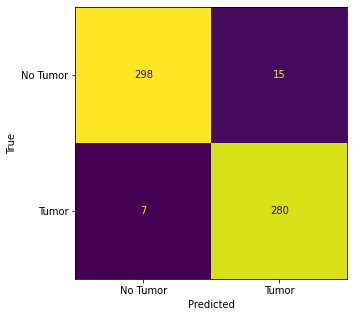

In [13]:
cm = metrics.ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=predictions, colorbar=False, display_labels=['No Tumor', 'Tumor'])
cm.ax_.set(xlabel='Predicted', ylabel='True')
cm.figure_.set_size_inches(5, 5)

## VGG-16 (Histogram equalization)

In [14]:
model = tf.keras.models.load_model('/content/gdrive/MyDrive/asub_dataset/colab - biljeznice/vgg16-model/best_model - histogram equal')

In [28]:
test_x_he = []
for img in X_test:
    img_grayScaled = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img_equ = cv.equalizeHist(img_grayScaled)
    img_final = cv.cvtColor(img_equ, cv.COLOR_GRAY2BGR)

    test_x_he.append(img_final)

In [29]:
test_x_he = tf.keras.utils.normalize(test_x_he, axis=1)

In [19]:
predictions = model.predict(test_x_he, verbose=True)
predictions = np.where(predictions > .5, 1, 0)

19/19 [==============================] - 2s 131ms/step


In [20]:
score = model.evaluate(test_x_he, y_test, verbose=1)

19/19 [==============================] - 3s 133ms/step - loss: 0.1463 - acc: 0.9417


In [21]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       313
           1       0.95      0.93      0.94       287

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600



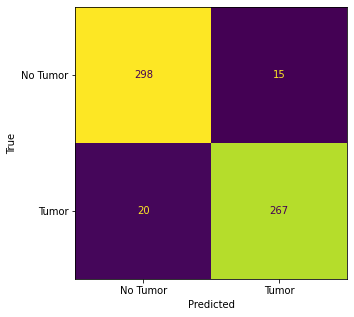

In [22]:
cm = metrics.ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=predictions, colorbar=False, display_labels=['No Tumor', 'Tumor'])
cm.ax_.set(xlabel='Predicted', ylabel='True')
cm.figure_.set_size_inches(5, 5)

## ResNet50

In [23]:
model = tf.keras.models.load_model('/content/gdrive/MyDrive/asub_dataset/colab - biljeznice/resnet/best_model')

In [24]:
predictions = model.predict(X_test, verbose=True)
predictions = np.where(predictions > .5, 1, 0)

19/19 [==============================] - 4s 114ms/step


In [25]:
score = model.evaluate(X_test, y_test, verbose=1)

19/19 [==============================] - 3s 90ms/step - loss: 0.1059 - accuracy: 0.9800 - auc: 0.9886


In [26]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       313
           1       0.99      0.97      0.98       287

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600



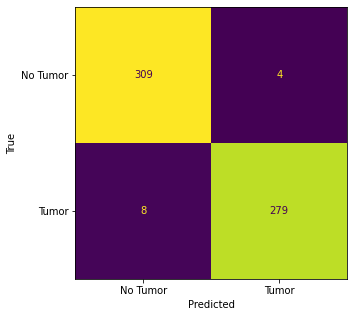

In [27]:
cm = metrics.ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=predictions, colorbar=False, display_labels=['No Tumor', 'Tumor'])
cm.ax_.set(xlabel='Predicted', ylabel='True')
cm.figure_.set_size_inches(5, 5)

## Vision transformer